In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

import pandas as pd
import seaborn as sb
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
data_train= pd.read_csv('data1.csv', sep=';') # načítanie datasetu
pd.set_option('display.max_columns', None) # zobrazenie všetkých stĺpcov
del data_train["koi_tce_delivname"] # odstránenie nepotrebných stĺpcou, v kotrých sú stringy alebo sú prázdne
del data_train["koi_teq_err1"]
del data_train["koi_teq_err2"]

In [34]:
data_test= pd.read_csv('cumulative.csv', sep=',') # načítanie datasetu
pd.set_option('display.max_columns', None) # zobrazenie všetkých stĺpcov
del data_test["koi_tce_delivname"] # odstránenie nepotrebných stĺpcou, v kotrých sú stringy alebo sú prázdne
del data_test["koi_teq_err1"]
del data_test["koi_teq_err2"]

In [53]:
data_train = data_train.fillna(0) # NaN hodnoty su nahradene 0
data_X_Train = data_train.iloc[1000:7000,7:] # Vyberanie dát na trénovanie
data_Y_Train = data_train.iloc[1000:7000,5]

data_test = data_test.fillna(0)
data_X_Test = data_test.iloc[8000:9000,7:] # Vyberanie dát na testovanie
data_Y_Test = data_test.iloc[8000:9000,6]

Y_Train = to_categorical(data_Y_Train, num_classes = None) # Využitie metódy to_categorical na kategorickú premenu
Y_Test = to_categorical(data_Y_Test, num_classes = None)

In [54]:
model = Sequential()
model.add(Dense(20, input_dim=40, kernel_initializer="uniform", activation='tanh')) # Vstupná vrstva má 20 neurónov a aktivačnú funkciu tanh
model.add(Dense(40, kernel_initializer="uniform", activation='tanh')) # Skrytá vrstva má 40 neurónov a aktivačnú funkciu tanh
model.add(Dense(2, kernel_initializer="uniform", activation='softmax')) # Výstupná vrstva má 2 neuróny a aktivačnú funkciu softmax


model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) # Na kompliáciu modelu bol použitý optimizer Adam- dosahoval najväčšiu presnosť
learning = model.fit(data_X_Train,Y_Train, epochs=1000, batch_size=100, verbose=0)


scores = model.evaluate(data_X_Train,Y_Train)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

6000/6000 [==============================] - 0s 80us/step

Accuracy: 86.57%


In [52]:
model.save('kepler-model.h5')

In [6]:
#for layer in model.layers: print(layer.get_config(), layer.get_weights())

In [55]:
model.predict_classes(data_X_Test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

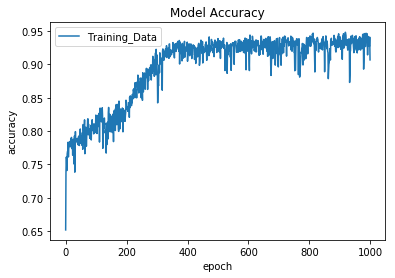

In [58]:
plt.plot(learning.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training_Data'])
plt.show()

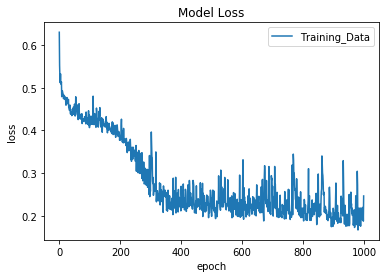

In [57]:
plt.plot(learning.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Data'])
plt.show()